<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NO.1 - RANDOM FOREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load data
file_path = "/content/processed_data (1).csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop irrelevant column
df = df.drop(columns=["Customer_ID"])

In [ ]:
# Remove class 3 due to insufficient data
df = df[df["cluster_catgeory"] != 3]

In [ ]:
# Split data
X = df.drop(columns=["cluster_catgeory"])
y = df["cluster_catgeory"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# Cross-validation score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

<ipython-input-41-0089aa104aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


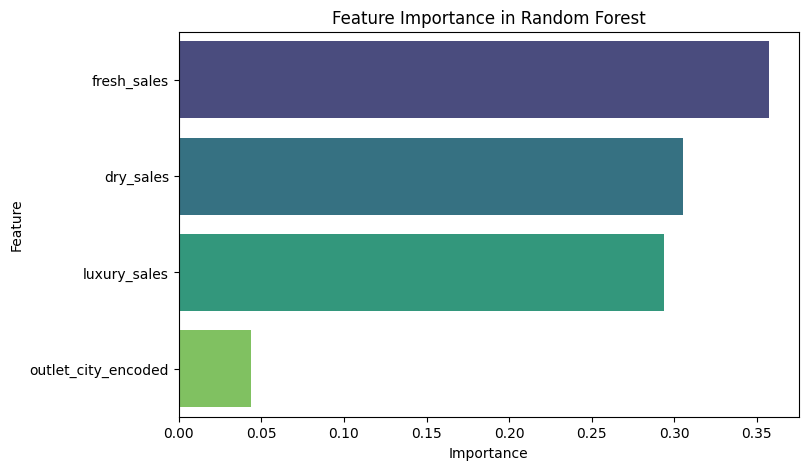

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()

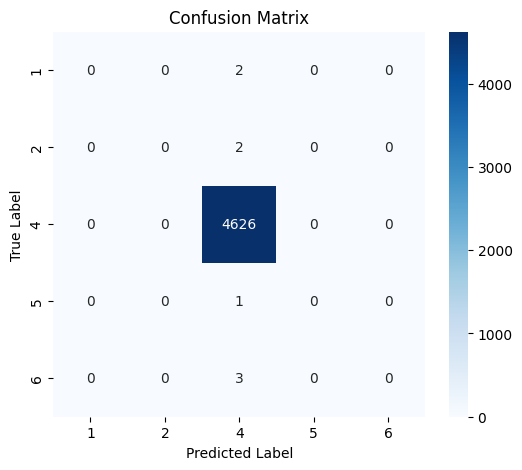

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Learning Curve
from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


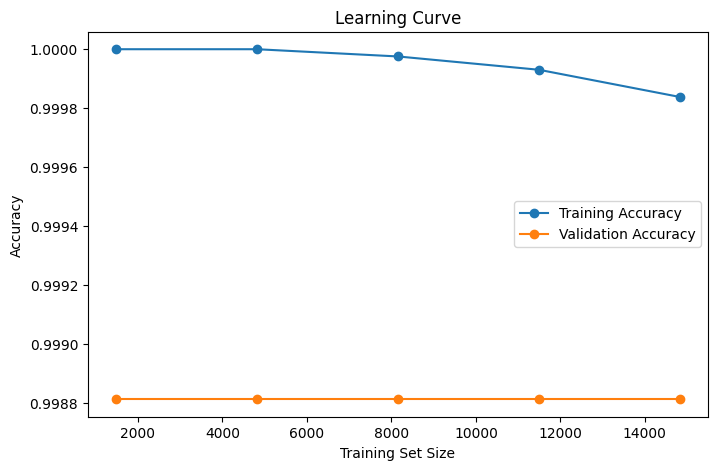

In [ ]:
# Plot Learning Curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
# Print Overfitting/Underfitting Indicators
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988


In [ ]:
# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Decision on overfitting/underfitting
if train_acc > 0.95 and (train_acc - test_acc) > 0.1:
    print("Overfitting Detected: High training accuracy but low test accuracy.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Underfitting Detected: Both training and test accuracy are low.")
else:
    print("Model is well-balanced.")

Model is well-balanced.


In [ ]:
# Print classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [2]:
# Loading the dataset
data = pd.read_csv('processed_data (1).csv')
print("Data Preview:\n", data.head())
print("\nTarget Class Distribution:\n", data['cluster_catgeory'].value_counts())

Data Preview:
    Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.018469    -1.254026  -0.742305                 4   
1     10178643     -0.299752    -0.478121  -0.377035                 1   
2     10513916      1.020050     0.596020   1.231109                 4   
3     10334589      0.993720     1.255928   1.202627                 4   
4     10458365      1.126974     2.097691   1.276297                 4   

   outlet_city_encoded  
0                    4  
1                    6  
2                   10  
3                   10  
4                    4  

Target Class Distribution:
 cluster_catgeory
4    23137
1        9
5        9
6        8
2        4
3        1
Name: count, dtype: int64


In [3]:
 # Removing the classes with less than 2 samples
class_counts = data['cluster_catgeory'].value_counts()
rare_classes = class_counts[class_counts < 2].index
data = data[~data['cluster_catgeory'].isin(rare_classes)]
print("\n After Removing Rare Classes:\n", data['cluster_catgeory'].value_counts())


 After Removing Rare Classes:
 cluster_catgeory
4    23137
1        9
5        9
6        8
2        4
Name: count, dtype: int64


In [4]:
# Defining Features and Target
X = data.drop(['Customer_ID', 'cluster_catgeory'], axis=1)
y = data['cluster_catgeory']

In [5]:
# Spliting  Test and Train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# PCA for Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
# SVM hyperparameter tuning with grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("\n Best SVM Parameters:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



 Best SVM Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [9]:
# Final SVM Model Training
svm_model = SVC(**grid_search.best_params_, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, class_weight='balanced', gamma=1, random_state=42)

In [10]:
# Accuracy and predictions
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred) * 100
test_acc = accuracy_score(y_test, y_test_pred) * 100

print(f"\n Training Accuracy: {train_acc:.2f}%")
print(f" Testing Accuracy: {test_acc:.2f}%")


 Training Accuracy: 97.83%
 Testing Accuracy: 97.45%


In [11]:
# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_test_pred))


 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       1.00      0.98      0.99      4628
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.97      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      0.97      0.99      4634



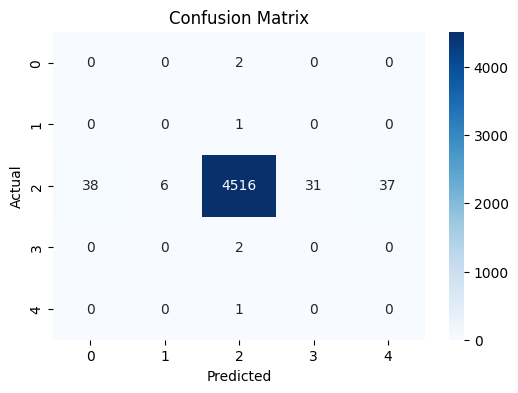

In [12]:
# Ploting confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()